In [1]:
import pandas as pd
import warnings 
warnings.filterwarnings("ignore")

In [2]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 1878-5713

 Directory of C:\Users\ibrah\Documents\GitHub\YapayZekaKamp\Projects\Military Powers of Countries

16.10.2022  23:58    <DIR>          .
16.10.2022  23:58    <DIR>          ..
16.10.2022  21:40    <DIR>          .ipynb_checkpoints
16.10.2022  23:55            32.397 Military Powers of Countries.ipynb
16.10.2022  23:58            55.165 World military power.xlsx
               2 File(s)         87.562 bytes
               3 Dir(s)  115.085.455.360 bytes free


In [3]:
df=pd.read_excel("World military power.xlsx")

In [4]:
df.head()

,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft,Fighter/Interceptor Strength,FighterInterceptor,Attack Aircraft Strength,AttackAircraft,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,...,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,TotalBorder
0,Afghanistan,1.3444,Afghanistan,260,Afghanistan,0,Afghanistan,25,Afghanistan,30,...,Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0,Afghanistan,1200,Afghanistan,5987.0
1,Albania,2.3137,Albania,19,Albania,0,Albania,0,Albania,0,...,Albania,"30,57,220",Albania,28748,Albania,362,Albania,41,Albania,691.0
2,Algeria,0.4659,Algeria,551,Algeria,103,Algeria,22,Algeria,59,...,Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998,Algeria,0,Algeria,6734.0
3,Angola,0.8379,Angola,295,Angola,72,Angola,18,Angola,30,...,Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600,Angola,1300,Angola,5369.0
4,Argentina,0.6521,Argentina,227,Argentina,24,Argentina,7,Argentina,9,...,Argentina,"4,46,94,198",Argentina,"27,80,400",Argentina,4989,Argentina,11000,Argentina,11968.0


In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [6]:
 df.isnull().sum()

Military Strength                           0
Military Strength Power Index               0
Aircraft Strength                           0
Aircraft                                    0
Fighter/Interceptor Strength                0
FighterInterceptor                          0
Attack Aircraft Strength                    0
AttackAircraft                              0
Transport Aircraft Fleet Strength           0
Transport Aircraft Fleet Strength value     0
Trainer Aircraft Fleet                      0
Trainer Aircraft Fleet value                0
Helicopter Fleet Strength                   0
Helicopter Fleet Strength value             0
Attack Helicopter Fleet Strength            0
AttackHelicopter                            0
Tank Strength                               0
Tank                                        0
AFV/APC Strength                            0
AFV/APC Strength value                      0
Self-Propelled Artillery Strength           0
Artillery                         

In [9]:
x=df[["FighterInterceptor", "AttackAircraft", "AttackHelicopter", "Tank","Artillery"]]

In [22]:
model=KMeans(n_clusters=4)

In [23]:
model=model.fit(x)

In [24]:
tahmin=model.predict(x)

In [25]:
tahmin=model.predict(x)

In [26]:
tahmin

array([0, 0, 5, 6, 6, 0, 0, 0, 6, 0, 6, 6, 0, 0, 0, 6, 0, 6, 5, 0, 6, 0,
       0, 0, 0, 6, 4, 0, 0, 5, 0, 0, 0, 0, 0, 7, 0, 0, 6, 0, 6, 0, 0, 6,
       0, 5, 0, 0, 0, 7, 6, 2, 6, 0, 2, 0, 0, 5, 5, 6, 0, 6, 0, 0, 0, 6,
       0, 6, 0, 0, 0, 0, 0, 0, 0, 6, 0, 5, 0, 6, 0, 0, 0, 0, 0, 0, 6, 8,
       0, 0, 0, 2, 0, 0, 0, 0, 5, 0, 0, 0, 5, 3, 5, 6, 0, 0, 0, 0, 0, 0,
       9, 0, 6, 0, 6, 0, 0, 6, 7, 5, 6, 0, 6, 0, 2, 6, 6, 2, 6, 6, 1, 0,
       6, 6, 2, 6, 0, 0])

In [27]:
x["cluster"]=tahmin

In [28]:
x.head()

,FighterInterceptor,AttackAircraft,AttackHelicopter,Tank,Artillery,cluster
0,0,25,0,0,0,0
1,0,0,0,0,0,0
2,103,22,45,880,320,5
3,72,18,15,379,28,6
4,24,7,0,370,83,6


In [29]:
silhouette_score(x,tahmin)

0.572911966266754

In [30]:
import matplotlib.pyplot as plt

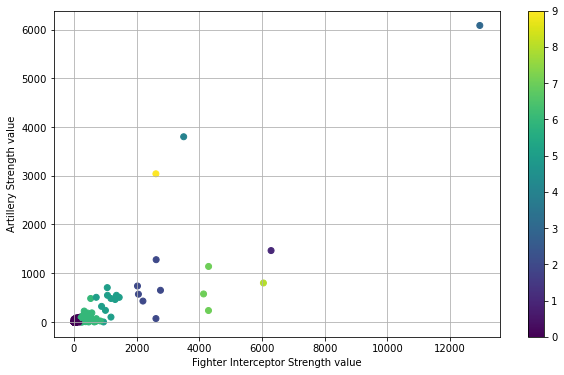

In [33]:
plt.figure(figsize=(10,6))
plt.scatter(x.Tank,x.Artillery,c=tahmin)
plt.xlabel("Fighter Interceptor Strength value")
plt.ylabel("Artillery Strength value")
plt.colorbar()
plt.grid()

In [34]:
allscore=[]
allclusters=[]
uzakliklar=[]
def clust(kactane):
    for i in range(1,kactane+1):
        i=i+1
        model=KMeans(n_clusters=i)
        model=model.fit(x)
        tahmin=model.predict(x)
        score=silhouette_score(x,tahmin)
        uzaklik=model.inertia_
        print("Cluster ",i," score ",score)
        allscore.append(score)
        allclusters.append(i)
        uzakliklar.append(uzaklik)
clust(10)

Cluster  2  score  0.8611789495830392
Cluster  3  score  0.8286520518781744
Cluster  4  score  0.7495599876586151
Cluster  5  score  0.7612245313573943
Cluster  6  score  0.6821488167727046
Cluster  7  score  0.6866007771968952
Cluster  8  score  0.5812611455135799
Cluster  9  score  0.5799561697932047
Cluster  10  score  0.572911966266754
Cluster  11  score  0.5498911979804868


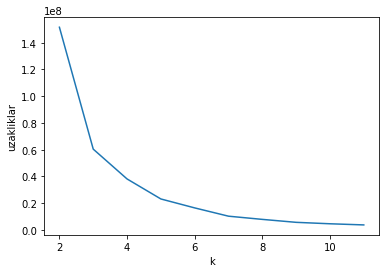

In [35]:
plt.xlabel("k")
plt.ylabel("uzakliklar")
plt.plot(allclusters,uzakliklar)